Model of a generalized Josephson Junction Quantum Memory Device

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [168]:
def generate_random_numbers(n):
    random_numbers = [random.random() for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 10
random_numbers = np.sort(generate_random_numbers(2 * num_of_junctions))

In [169]:
# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
arrayOfJunctions = random_numbers
# arrayOfJunctions = [0, 0.02, 0.5, 0.6, 0.99, 1]
print(arrayOfJunctions)

[0.04765058 0.05732125 0.05760668 0.21624634 0.23755683 0.23950123
 0.24104998 0.25308324 0.29631888 0.31099456 0.37068181 0.45466765
 0.59493447 0.63307288 0.67903631 0.69111639 0.70350403 0.76386059
 0.98029353 0.98263903]


In [170]:
critical_currents_density = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

criticalCurrents = []

junctionWidths = []

for i in range(len(arrayOfJunctions)//2):
    junctionWidths.append(arrayOfJunctions[2*i+1] - arrayOfJunctions[2*i])

for i in range (len(junctionWidths)):
    criticalCurrents.append(junctionWidths[i] * critical_currents_density[i])

print(criticalCurrents)

[0.009670667041395076, 0.15863965682977477, 0.001944407855761221, 0.012033260278679347, 0.014675674475856715, 0.08398583741994303, 0.03813841448808952, 0.012080079062058657, 0.06035655711393095, 0.002345496123347557]


prints out the elements in the junction in a better format

In [171]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0.04765058170979197 - 0.05732124875118705, 0.05760668176785588 - 0.21624633859763065, 0.237556826389976 - 0.23950123424573722, 0.24104998019568147 - 0.2530832404743608, 0.2963188840014086 - 0.3109945584772653, 0.3706818101429473 - 0.45466764756289035, 0.5949344699771348 - 0.6330728844652244, 0.67903631342409 - 0.6911163924861486, 0.7035040308533779 - 0.7638605879673088, 0.9802935328160016 - 0.9826390289393492 

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [172]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [173]:
def maxCurrent(B, arrayJ, arrayC, numOfSegments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, numOfSegments))
    return max(dummyArray)

In [174]:
MagField = np.linspace(-10, 10, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [175]:
IMaxPoint = []

In [176]:
numOfSegments = 5

In [177]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents, numOfSegments) / np.sum(criticalCurrents)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

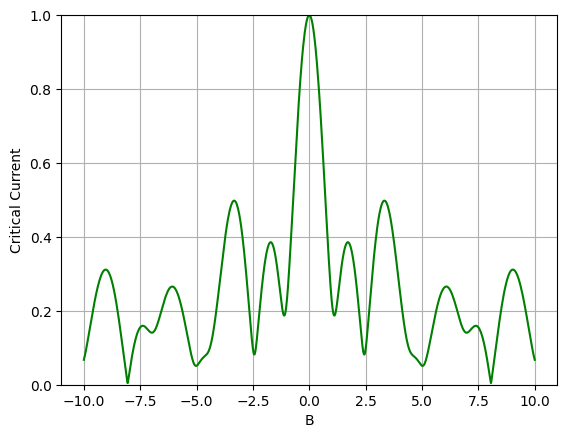

<Figure size 640x480 with 0 Axes>

In [178]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.ylim(0,1) 
plt.grid()            
plt.show()
plt.savefig('10-random-junctions:B=-5to5.png')

In [179]:
print(max(IMaxPoint))

0.9999818989061987


In [180]:
print(min(IMaxPoint))

0.004407346076055827


In [181]:
print(np.mean(junctionWidths))

0.039387005068883686


In [182]:
print(np.std(junctionWidths))

0.04734253851342225


In [183]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

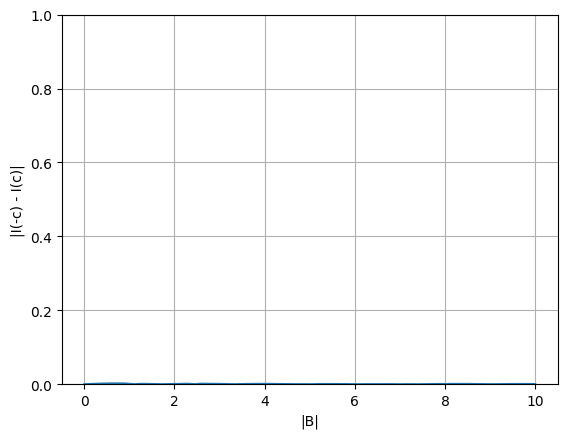

In [184]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-c) - I(c)|')
plt.ylim(0,1)
plt.grid()
plt.show()